<a href="https://colab.research.google.com/github/julioaguiar07/FORMULA-1-ESTATISTICAS/blob/main/GR%C3%81FICOS_C%C3%93DIGOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# POSIÇÕES DOS PILOTOS POR CORRIDA:
- Os arquivos "posicao_por_corrida.csv" e "relatorio_pilotos.csv" foram obtidos através da limpeza, tratamento e conexões com outros datasets disponíveis no Kaggle: [clique aqui para acessar](https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020?select=races.csv).

Dados faltantes por coluna em posicao_por_corrida:
driverRef     0
circuitRef    0
date          0
position      0
dtype: int64


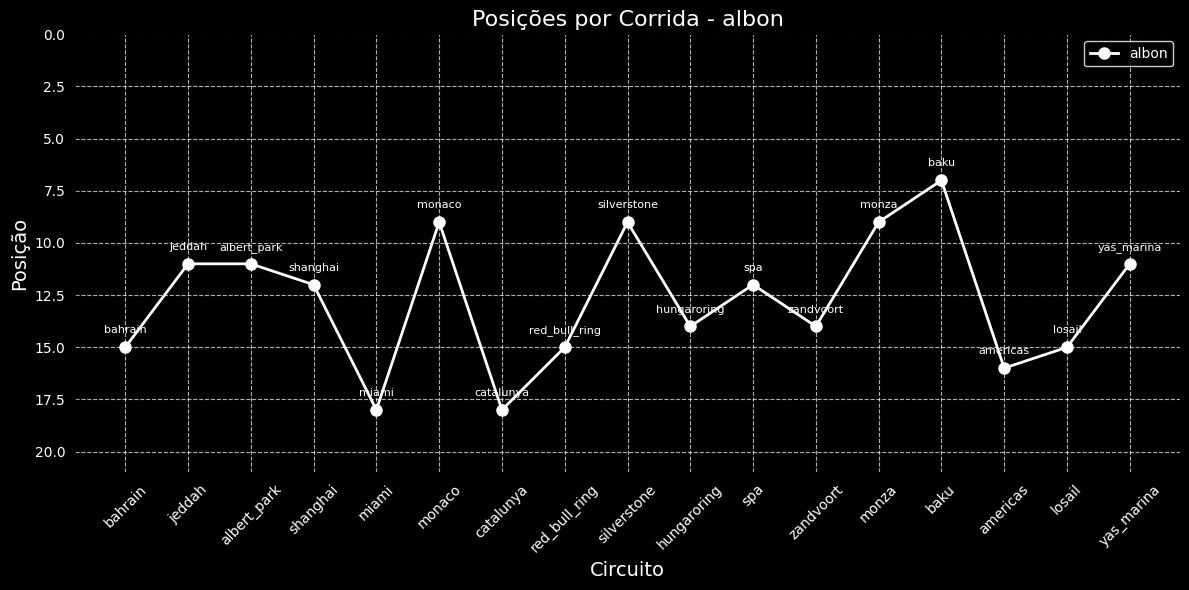

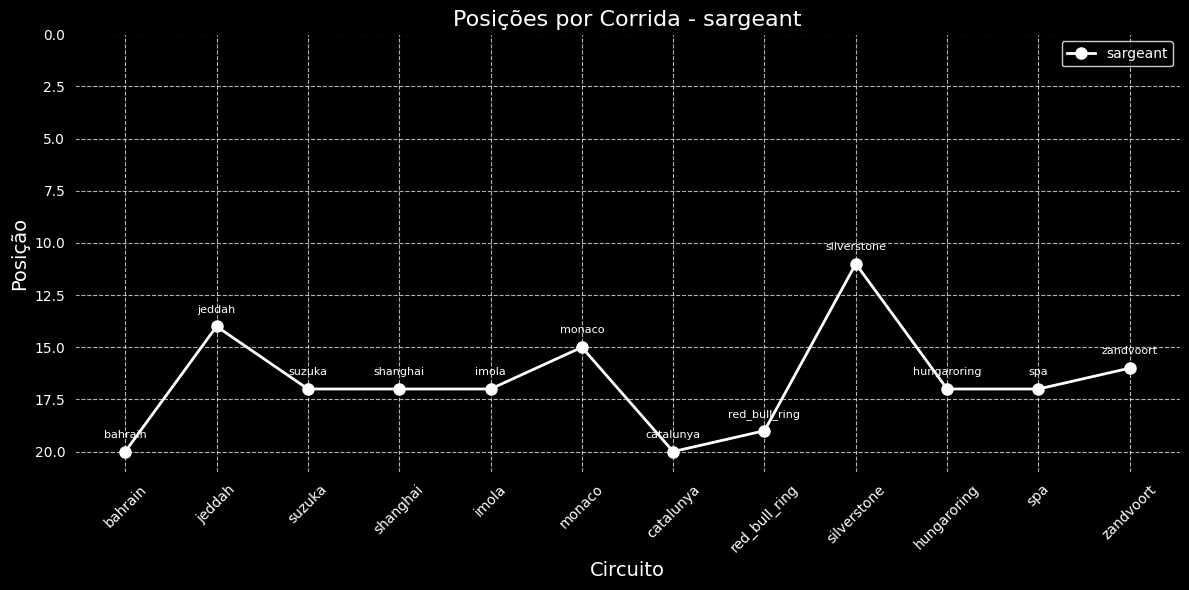

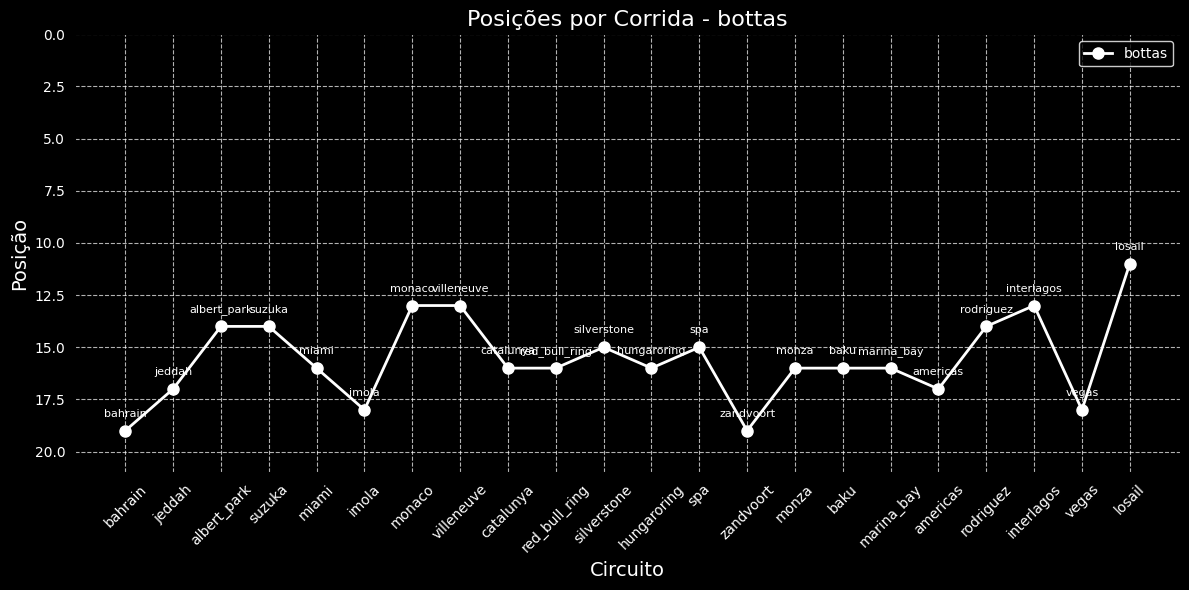

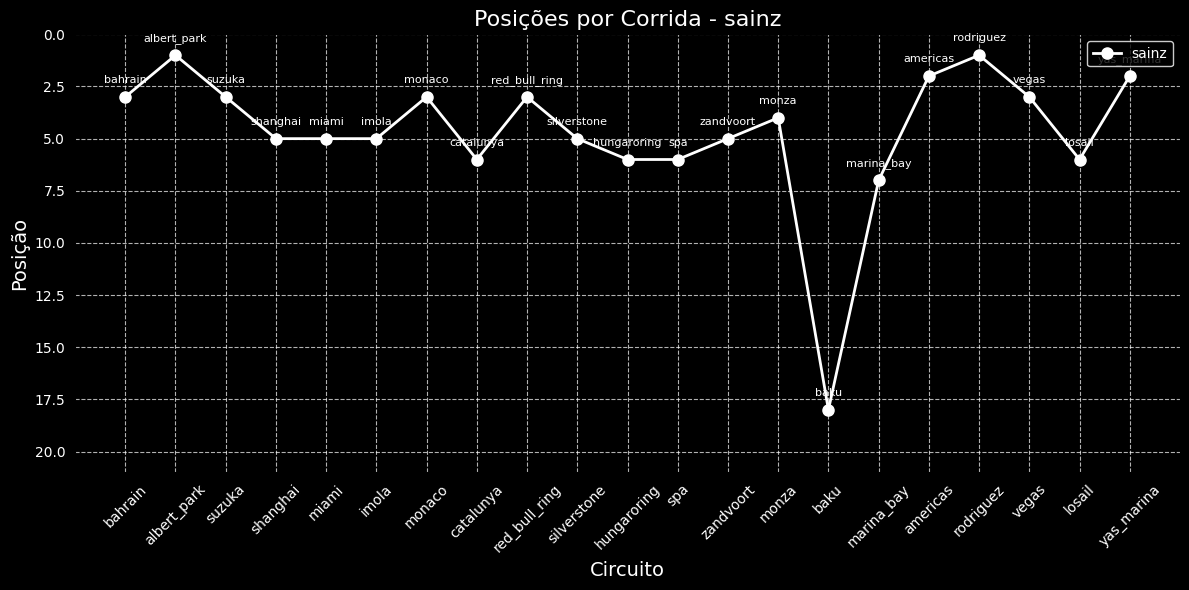

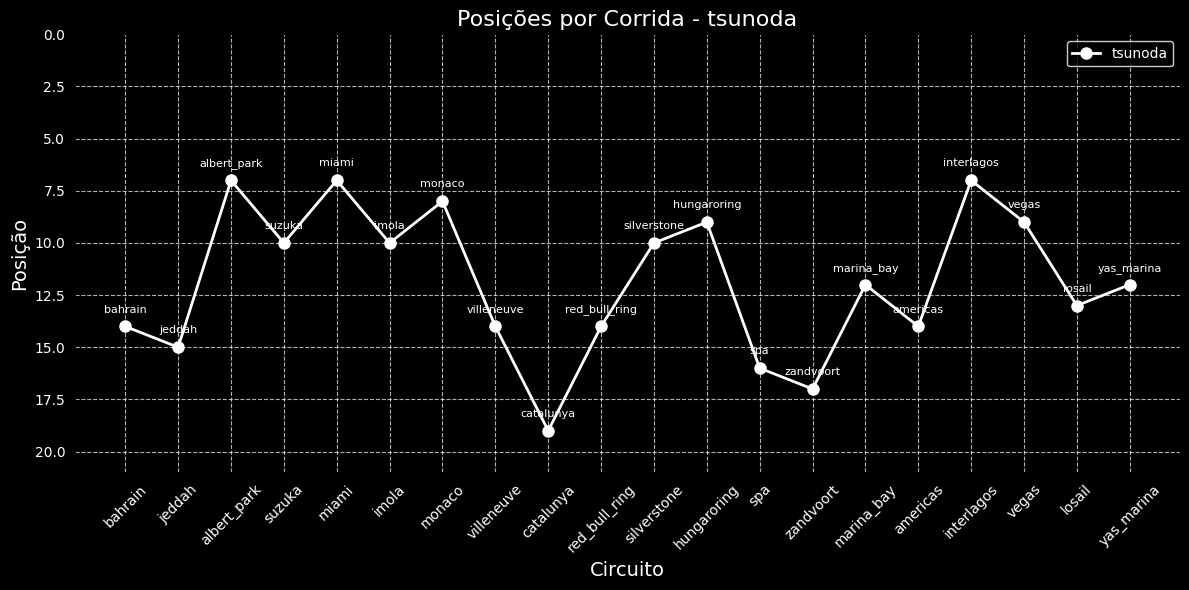

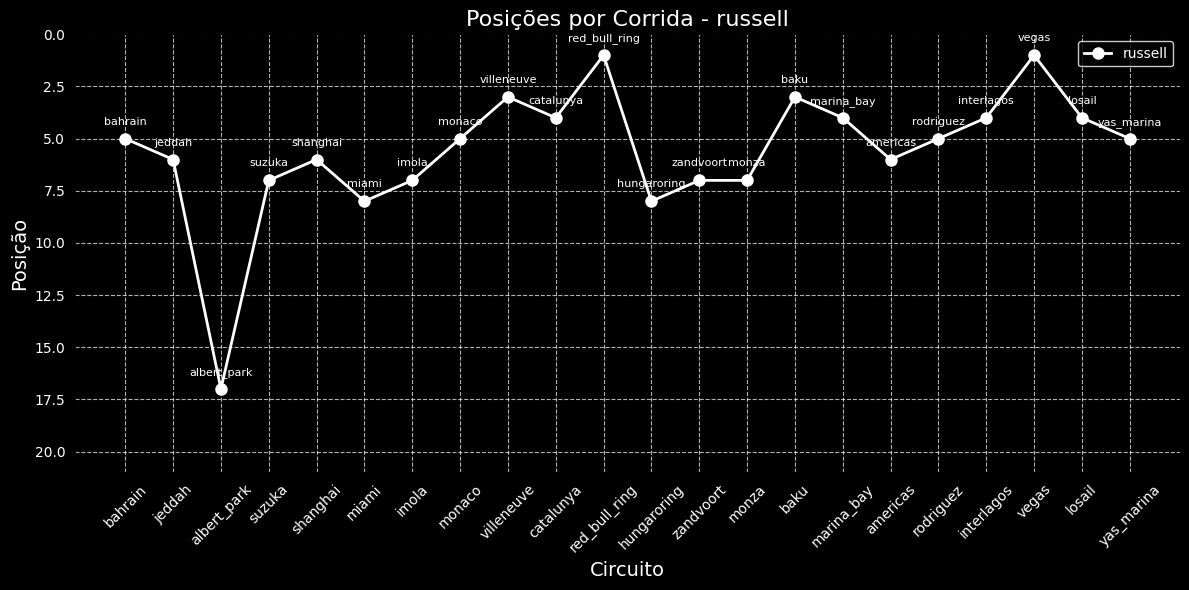

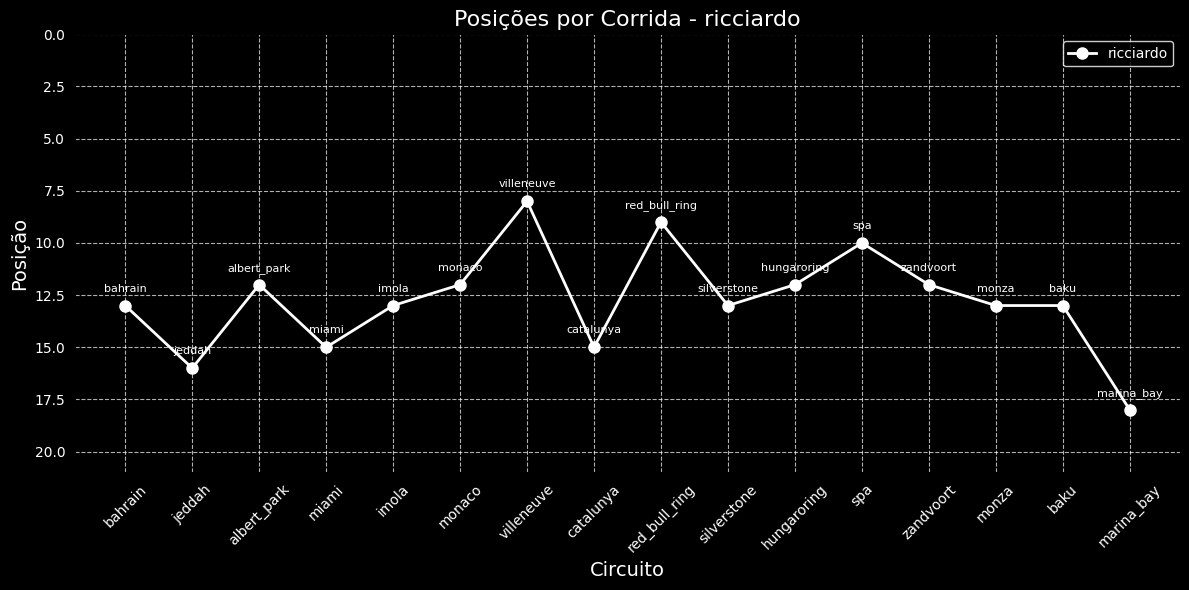

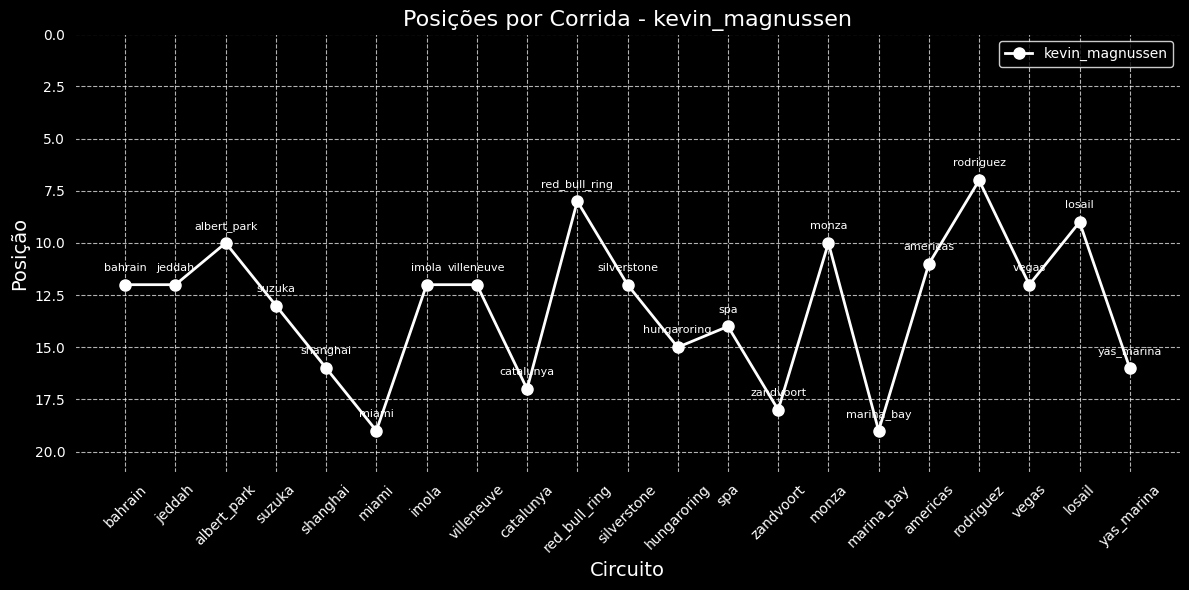

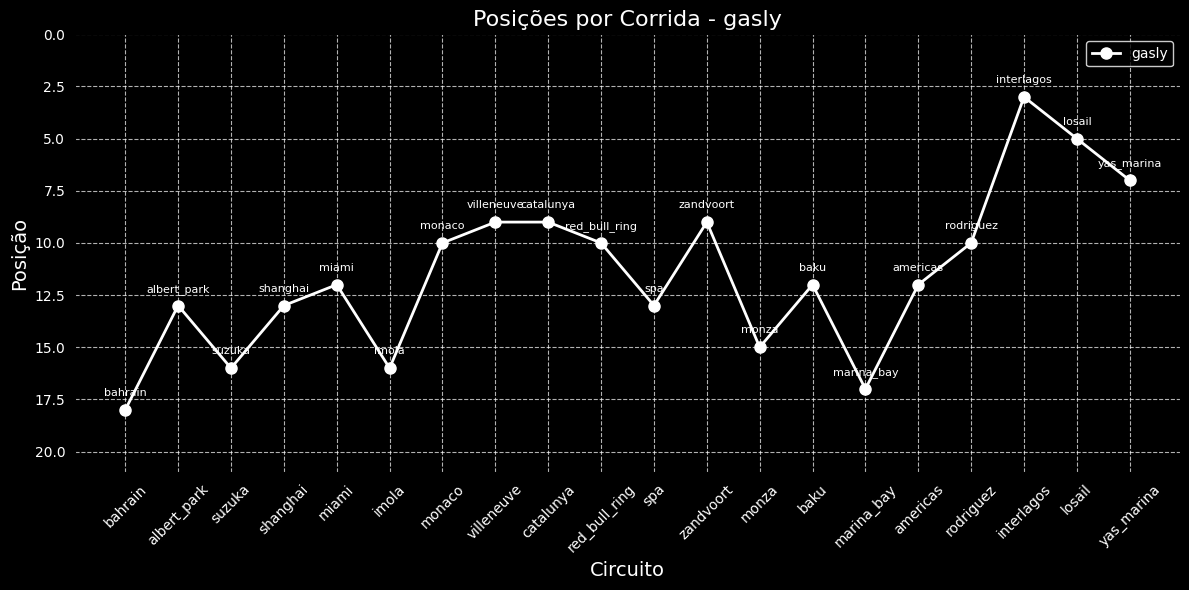

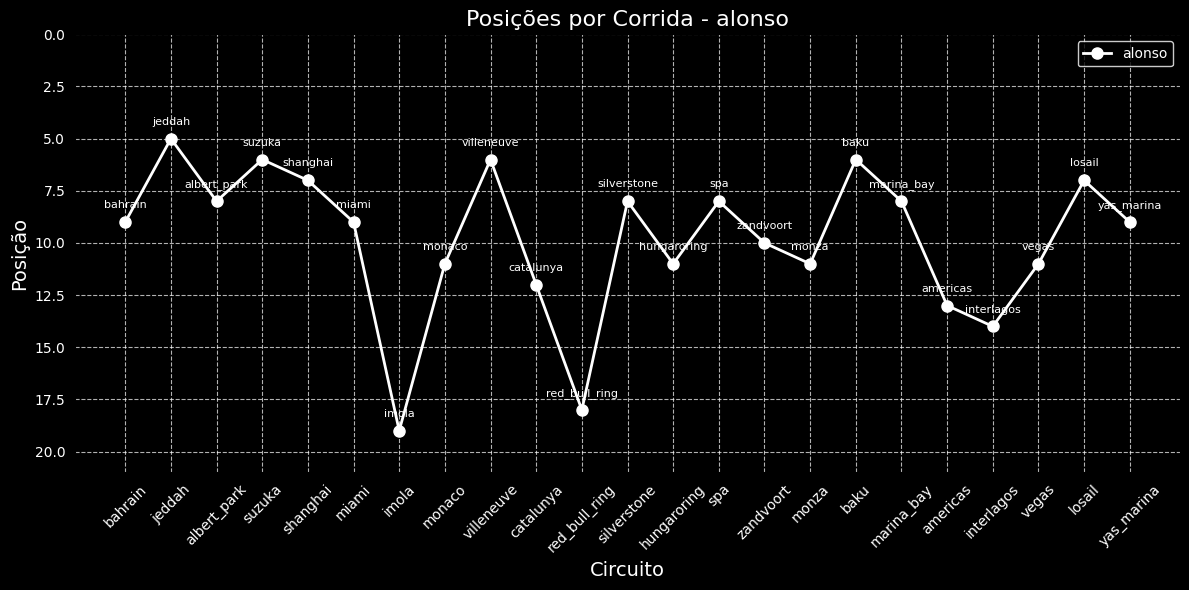

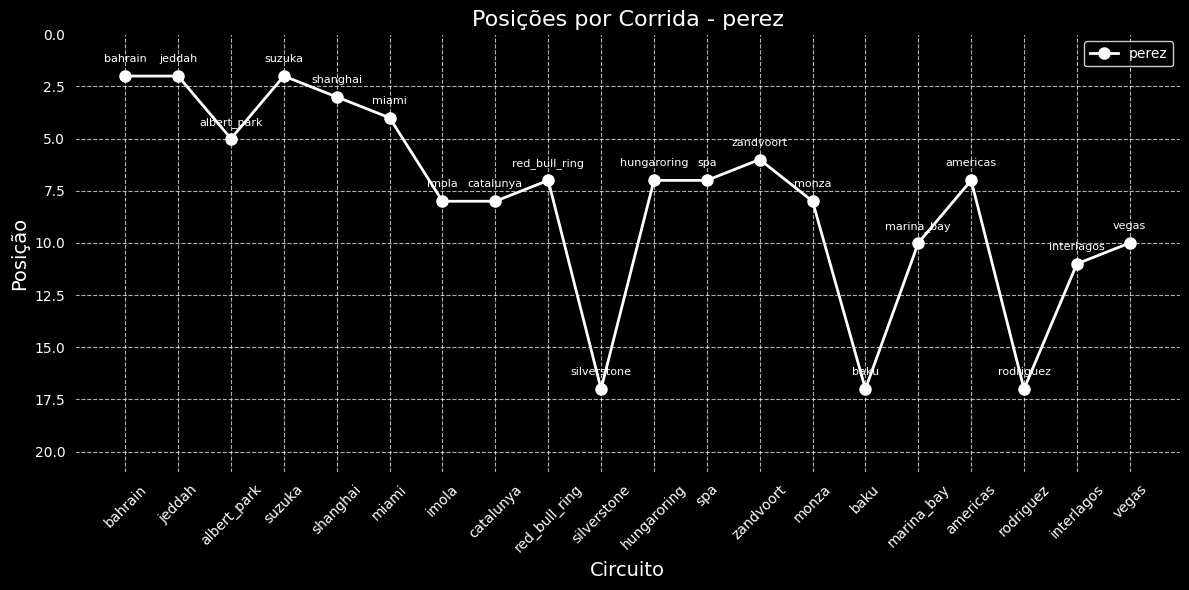

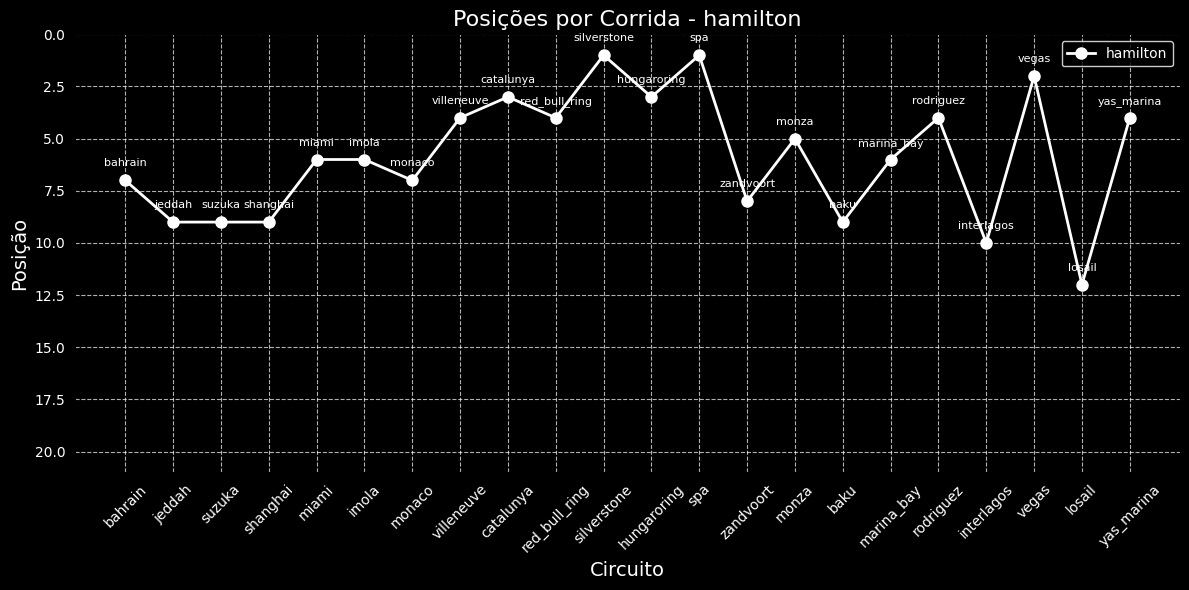

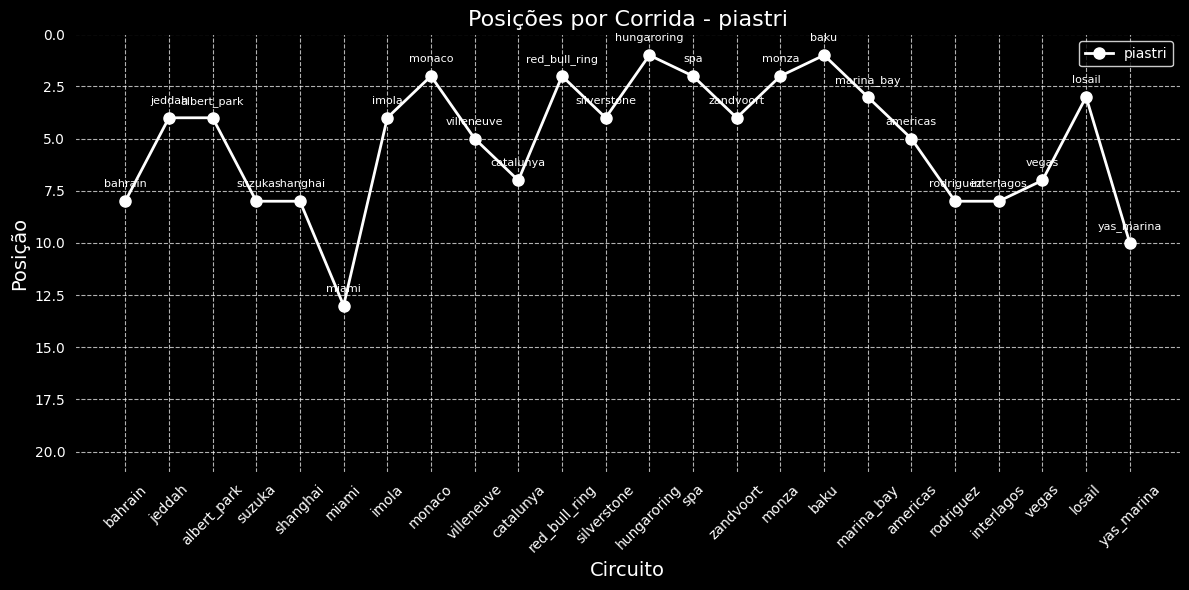

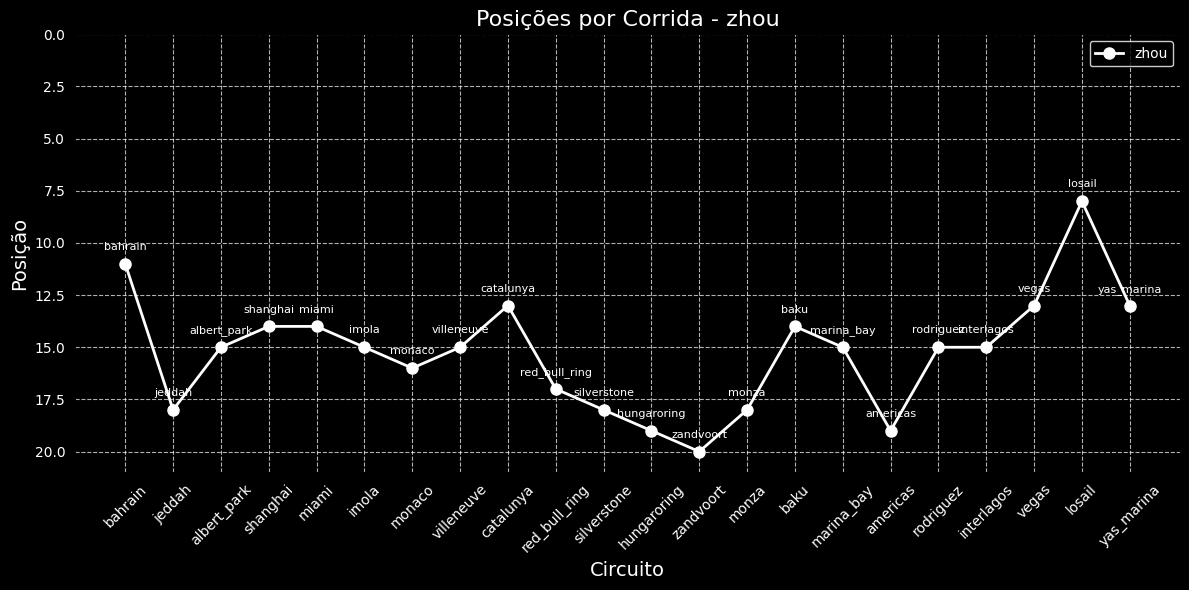

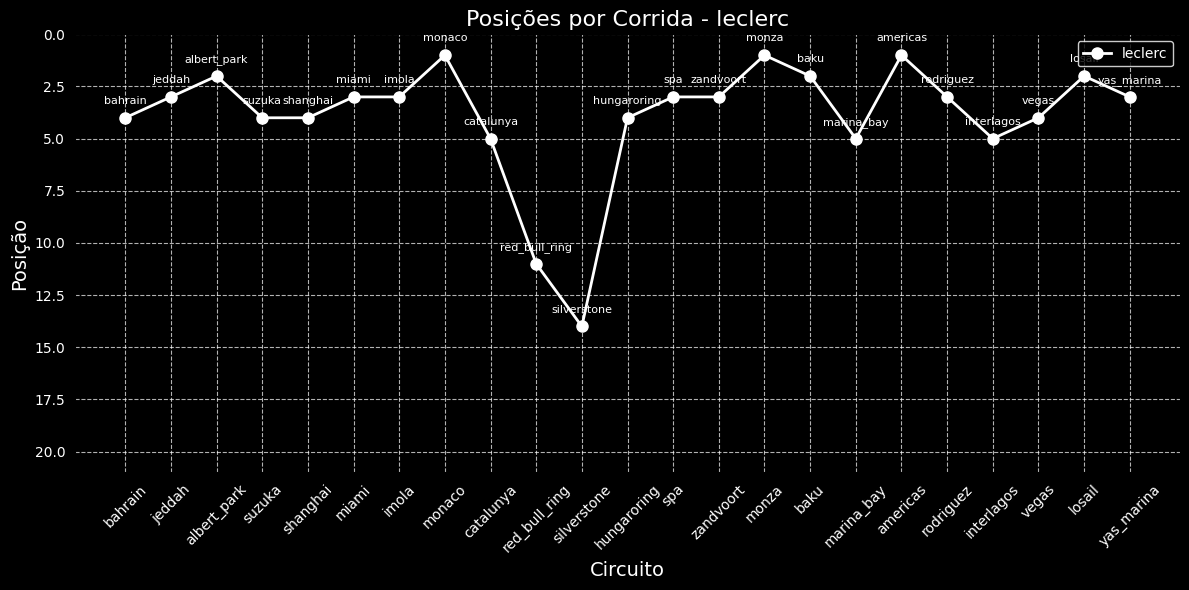

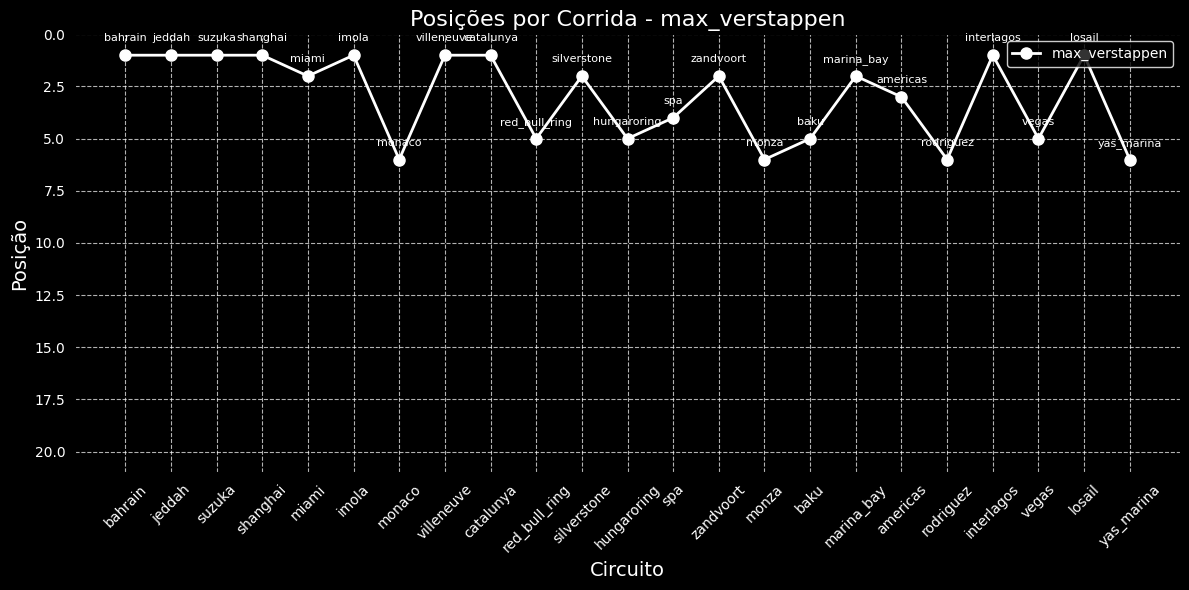

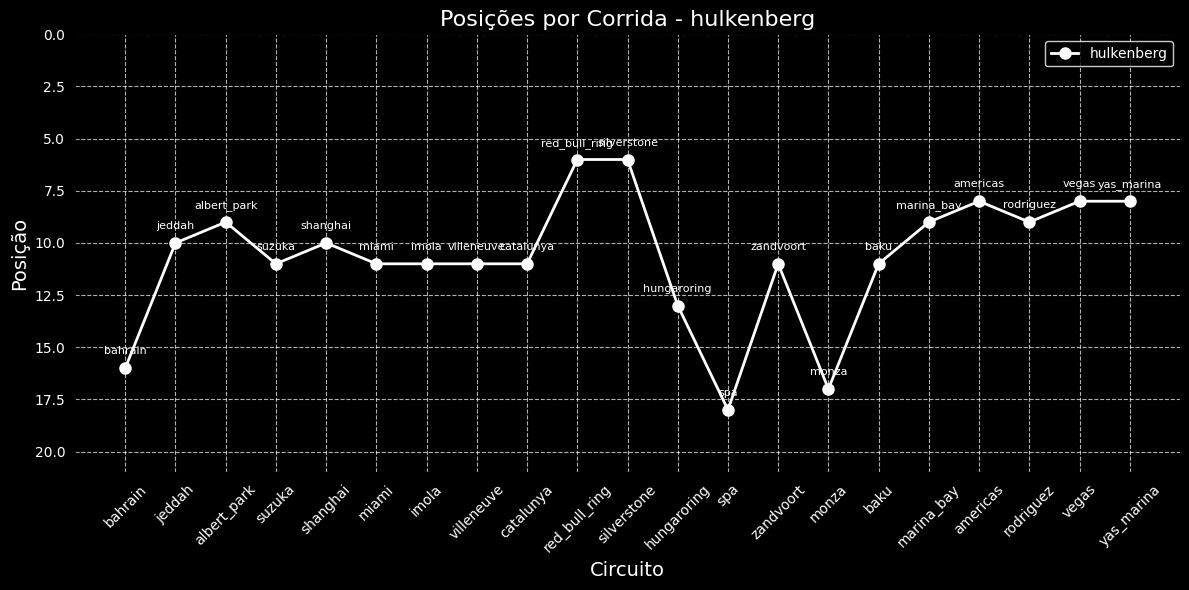

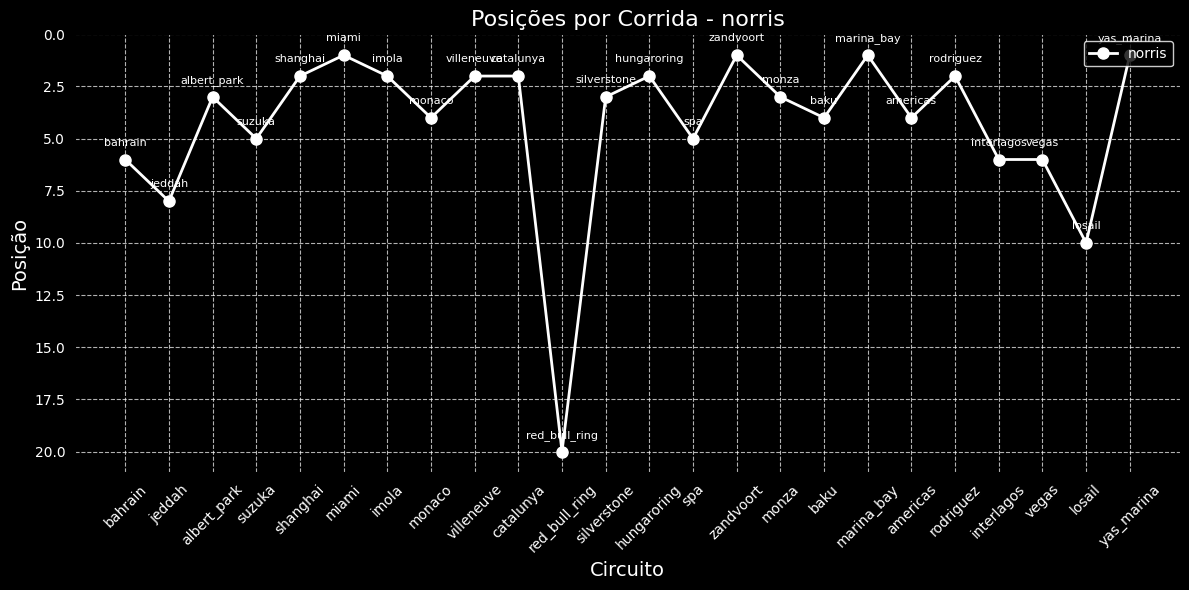

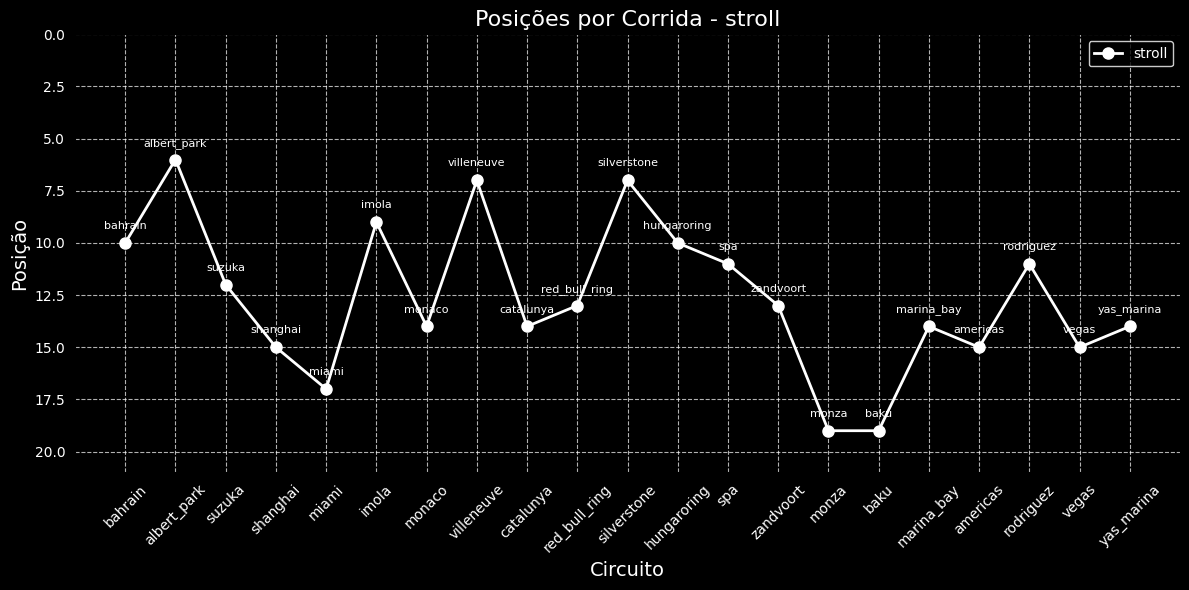

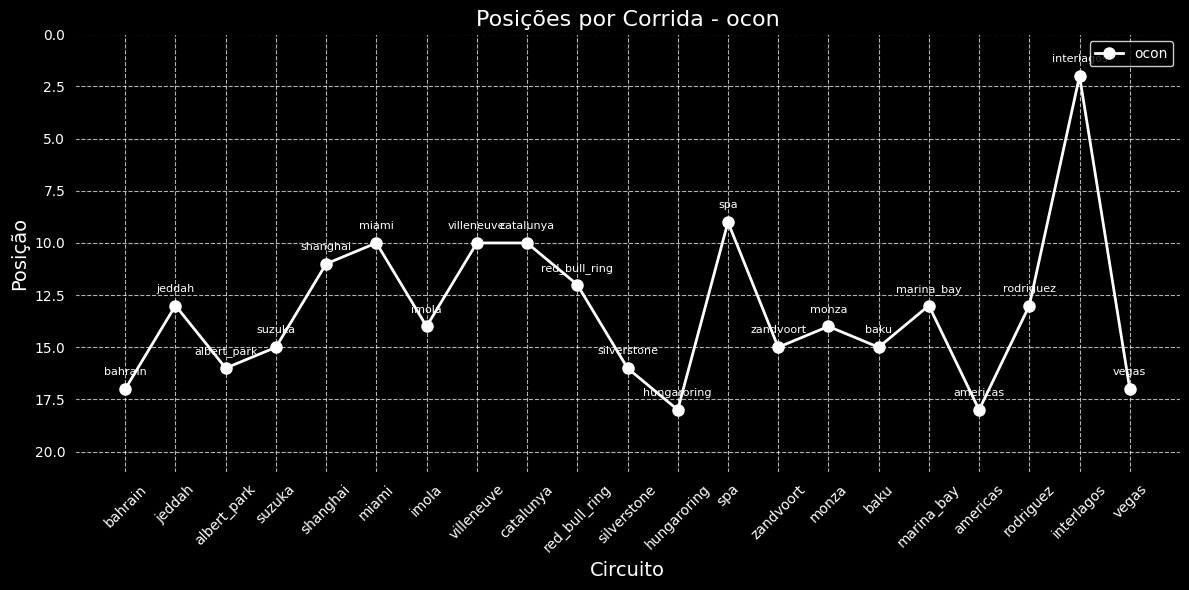

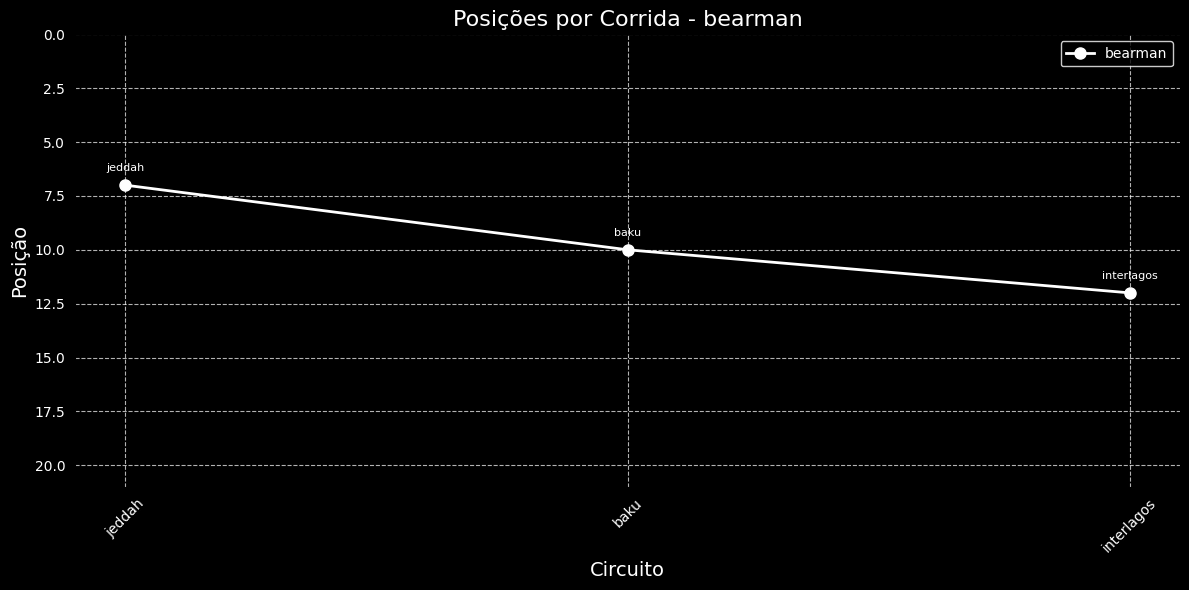

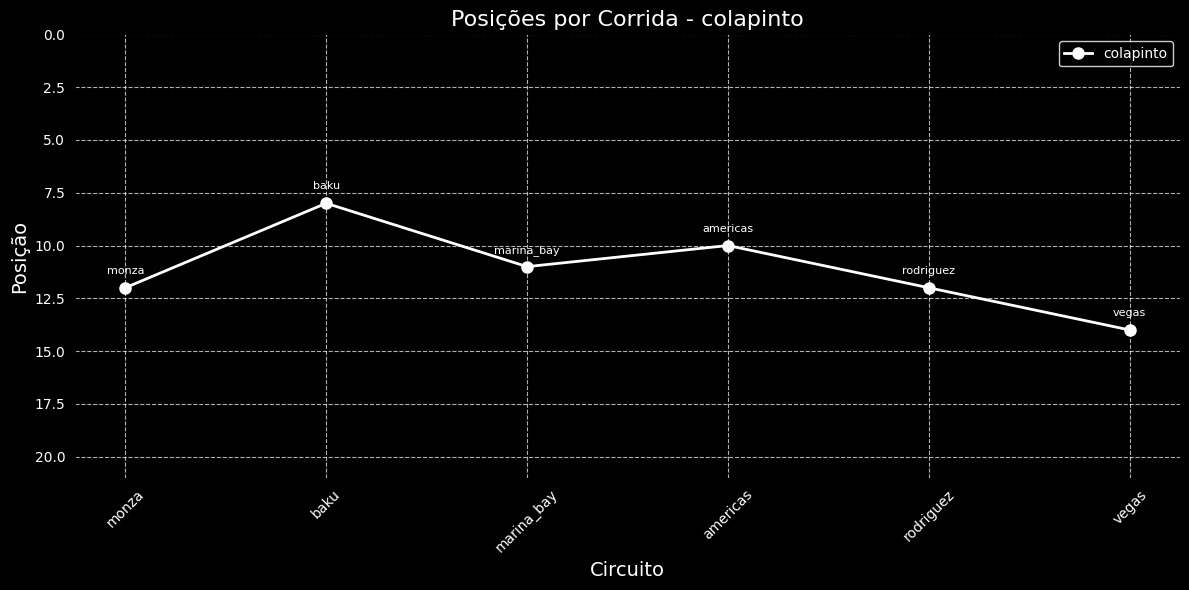

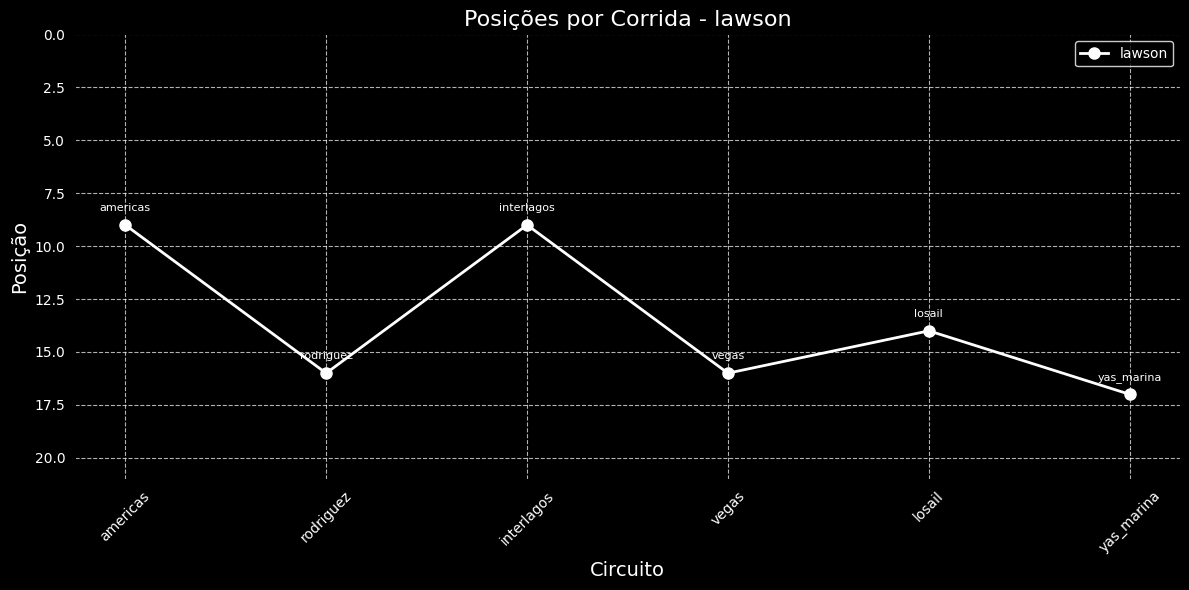

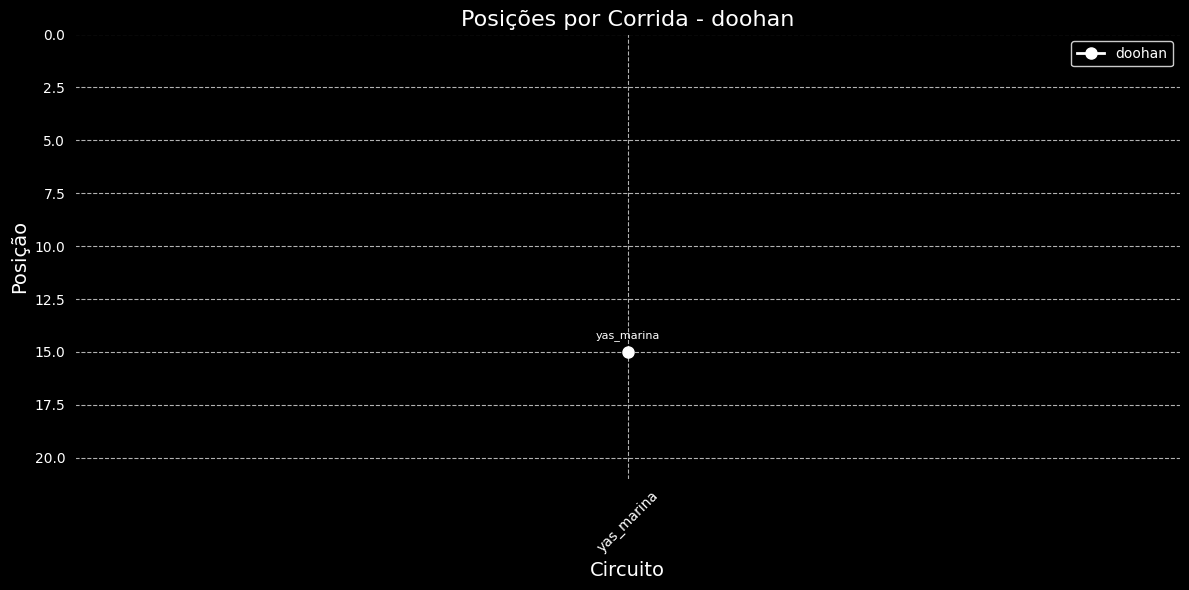

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Carregar os arquivos
posicao_por_corrida = pd.read_csv('posicao_por_corrida.csv')

# Verificar se há dados faltantes
print("Dados faltantes por coluna em posicao_por_corrida:")
print(posicao_por_corrida.isnull().sum())

# Substituir \N por 20 na coluna 'position' (último lugar)
posicao_por_corrida['position'] = posicao_por_corrida['position'].replace('\\N', 20)

# Converter a coluna 'position' para numérica
posicao_por_corrida['position'] = pd.to_numeric(posicao_por_corrida['position'], errors='coerce')

# Converter a coluna 'date' para datetime
posicao_por_corrida['date'] = pd.to_datetime(posicao_por_corrida['date'])

# Ordenar os dados pela data das corridas
posicao_por_corrida = posicao_por_corrida.sort_values(by='date')

# Lista de pilotos únicos
pilotos_unicos = posicao_por_corrida['driverRef'].unique()

# Criar um gráfico para cada piloto
for driver in pilotos_unicos:
    # Filtrar os dados do piloto
    driver_data = posicao_por_corrida[posicao_por_corrida['driverRef'] == driver]

    # Criar o gráfico com fundo preto e linhas brancas
    plt.figure(figsize=(12, 6), facecolor='black')  # Fundo preto
    ax = plt.gca()
    ax.set_facecolor('black')  # Fundo preto para a área do gráfico

    # Plotar as posições com linha branca
    plt.plot(driver_data['circuitRef'], driver_data['position'], marker='o', color='white', linestyle='-', linewidth=2, markersize=8, label=driver)

    # Adicionar o nome do circuito em cada ponto
    for i, row in driver_data.iterrows():
        plt.annotate(
            row['circuitRef'],  # Texto a ser exibido (nome do circuito)
            (row['circuitRef'], row['position']),  # Posição do ponto
            textcoords="offset points",  # Posicionamento do texto em relação ao ponto
            xytext=(0, 10),  # Deslocamento do texto (10 pontos acima do ponto)
            ha='center',  # Alinhamento horizontal do texto
            fontsize=8,  # Tamanho da fonte
            color='white'  # Cor do texto (branco)
        )

    # Personalizar o gráfico
    plt.title(f'Posições por Corrida - {driver}', fontsize=16, color='white')  # Título branco
    plt.xlabel('Circuito', fontsize=14, color='white')  # Eixo X branco
    plt.ylabel('Posição', fontsize=14, color='white')  # Eixo Y branco
    plt.gca().invert_yaxis()  # Inverter o eixo Y para a posição 1 ficar no topo
    plt.ylim(21, 0)  # Fixar a escala do eixo Y de 0 a 21
    plt.grid(True, linestyle='--', alpha=0.7, color='white')  # Grade branca
    plt.xticks(rotation=45, color='white')  # Rótulos do eixo X brancos
    plt.yticks(color='white')  # Rótulos do eixo Y brancos
    plt.legend(loc='upper right', fontsize=10, facecolor='black', edgecolor='white', labelcolor='white')  # Legenda com fundo preto e texto branco
    plt.tight_layout()

    # Mostrar o gráfico
    plt.show()

Dados faltantes por coluna:
raceId             0
year               0
round              0
circuitId          0
name_x             0
date               0
time_x             0
url_x              0
fp1_date           0
fp1_time           0
fp2_date           0
fp2_time           0
fp3_date           0
fp3_time           0
quali_date         0
quali_time         0
sprint_date        0
sprint_time        0
circuitRef         0
name_y             0
location           0
country            0
lat                0
lng                0
alt                0
url_y              0
resultId           0
driverId           0
constructorId      0
number_x           0
grid               0
position           0
positionText       0
positionOrder      0
points             0
laps               0
time_y             0
milliseconds       0
fastestLap         0
rank               0
fastestLapTime     0
fastestLapSpeed    0
statusId           0
driverRef          0
number_y           0
code               0
forena

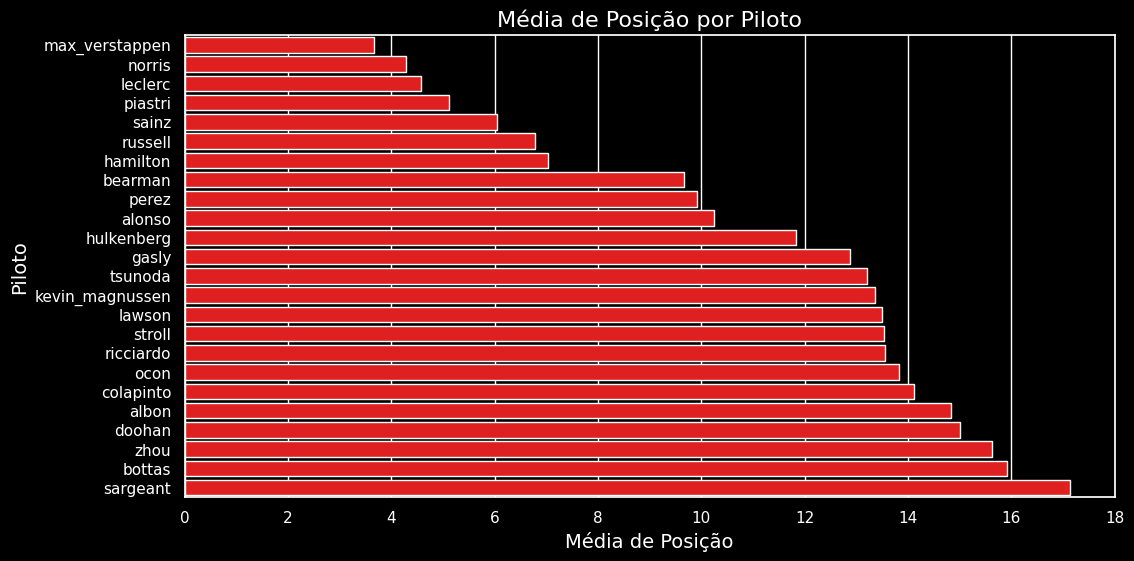

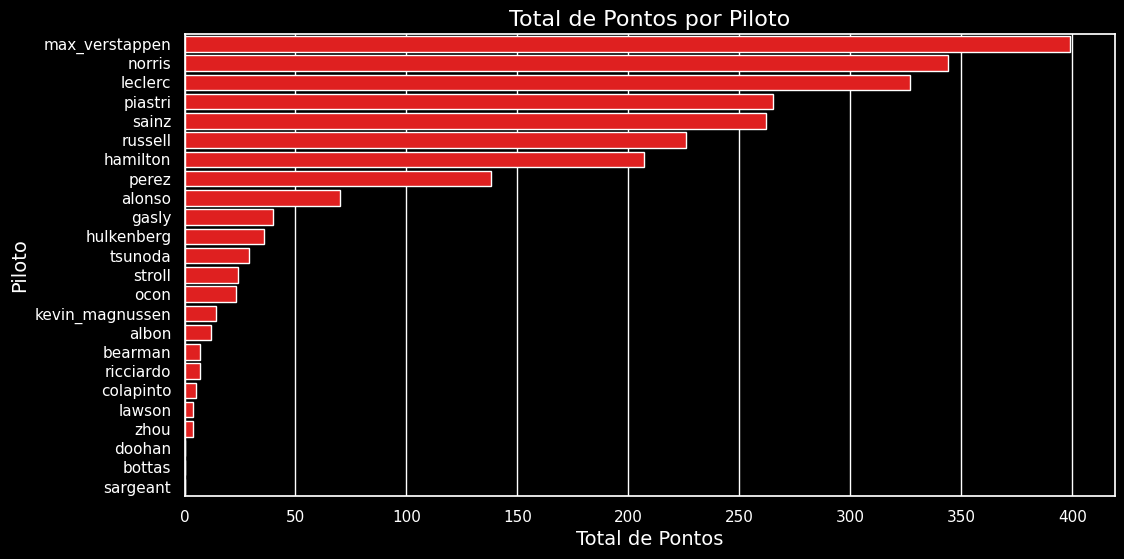

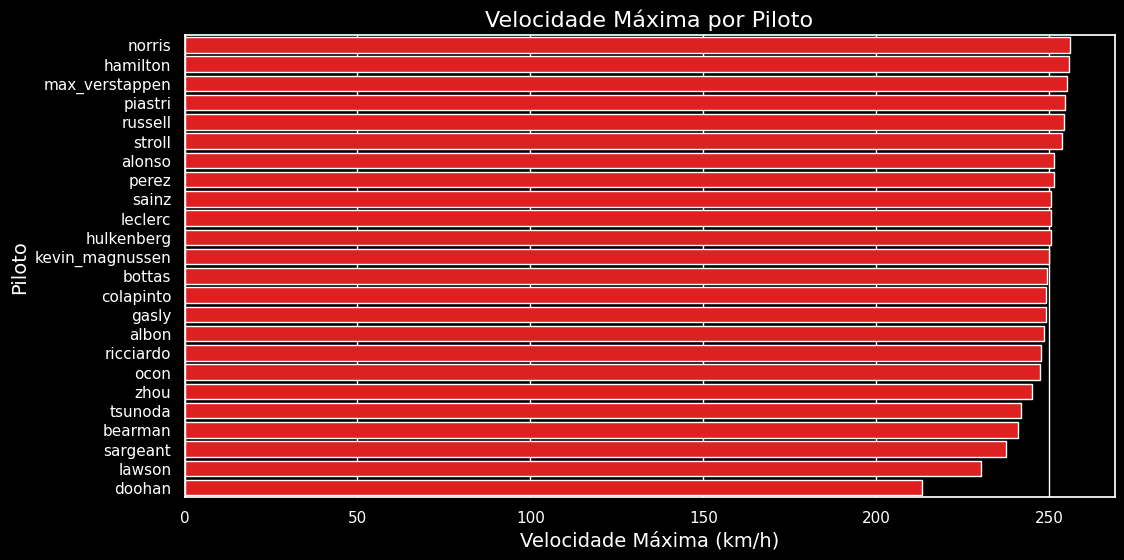

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados
dados = pd.read_csv('full_data_2024.csv')

# Verificar dados faltantes
print("Dados faltantes por coluna:")
print(dados.isnull().sum())

# Limpeza básica dos dados
dados['position'] = dados['position'].replace('\\N', 20)  # Substituir \N por 20 (último lugar)
dados['position'] = pd.to_numeric(dados['position'], errors='coerce')  # Converter para numérico
dados['fastestLapSpeed'] = pd.to_numeric(dados['fastestLapSpeed'], errors='coerce')  # Converter para numérico

# 1. Estatísticas Gerais dos Pilotos
# Média de posição por piloto
media_posicao = dados.groupby('driverRef')['position'].mean().sort_values().reset_index()
media_posicao.columns = ['Piloto', 'Média de Posição']

# Número de pódios (posições 1, 2, 3)
podiums = dados[dados['position'].isin([1, 2, 3])].groupby('driverRef').size().reset_index()
podiums.columns = ['Piloto', 'Número de Pódios']

# Número de vitórias
vitorias = dados[dados['position'] == 1].groupby('driverRef').size().reset_index()
vitorias.columns = ['Piloto', 'Número de Vitórias']

# 2. Análise de Voltas Rápidas
# Melhor volta rápida por piloto
melhor_volta = dados.groupby('driverRef')['fastestLapTime'].min().reset_index()
melhor_volta.columns = ['Piloto', 'Melhor Volta Rápida']

# Média de velocidade na volta rápida
media_velocidade_volta = dados.groupby('driverRef')['fastestLapSpeed'].mean().reset_index()
media_velocidade_volta.columns = ['Piloto', 'Média de Velocidade na Volta Rápida']

# 3. Análise de Velocidade Máxima
# Velocidade máxima por piloto
velocidade_maxima = dados.groupby('driverRef')['fastestLapSpeed'].max().reset_index()
velocidade_maxima.columns = ['Piloto', 'Velocidade Máxima']

# 4. Consistência e Variabilidade
# Desvio padrão das posições por piloto
desvio_posicao = dados.groupby('driverRef')['position'].std().reset_index()
desvio_posicao.columns = ['Piloto', 'Desvio Padrão das Posições']

# 5. Análise de Pontuação
# Total de pontos por piloto
total_pontos = dados.groupby('driverRef')['points'].sum().reset_index()
total_pontos.columns = ['Piloto', 'Total de Pontos']

# 6. Análise de Largada vs. Chegada
# Média de diferença entre grid e posição final
dados['diff_grid_position'] = dados['grid'] - dados['position']
media_diff_grid_position = dados.groupby('driverRef')['diff_grid_position'].mean().reset_index()
media_diff_grid_position.columns = ['Piloto', 'Média de Diferença (Grid - Posição)']

# 7. Juntar todas as estatísticas em um único DataFrame
estatisticas = media_posicao.merge(podiums, on='Piloto', how='left') \
                             .merge(vitorias, on='Piloto', how='left') \
                             .merge(melhor_volta, on='Piloto', how='left') \
                             .merge(media_velocidade_volta, on='Piloto', how='left') \
                             .merge(velocidade_maxima, on='Piloto', how='left') \
                             .merge(desvio_posicao, on='Piloto', how='left') \
                             .merge(total_pontos, on='Piloto', how='left') \
                             .merge(media_diff_grid_position, on='Piloto', how='left')

# Exibir as estatísticas
print(estatisticas)

# 8. Salvar as estatísticas em um novo arquivo CSV
estatisticas.to_csv('estatisticas_pilotos.csv', index=False)  # Salvar sem o índice
print("Arquivo 'estatisticas_pilotos.csv' criado com sucesso!")

# 9. Visualizações Gráficas (opcional)
# Configuração do estilo dos gráficos
sns.set(style="darkgrid", palette="dark")  # Fundo escuro

# Gráfico 1: Média de Posição por Piloto
plt.figure(figsize=(12, 6), facecolor='black')  # Fundo preto
ax = plt.gca()
ax.set_facecolor('black')  # Fundo preto para a área do gráfico
sns.barplot(x='Média de Posição', y='Piloto', data=estatisticas.sort_values('Média de Posição', ascending=True), color='red')  # Barras vermelhas
plt.title('Média de Posição por Piloto', fontsize=16, color='white')  # Título branco
plt.xlabel('Média de Posição', fontsize=14, color='white')  # Eixo X branco
plt.ylabel('Piloto', fontsize=14, color='white')  # Eixo Y branco
plt.xticks(color='white')  # Rótulos do eixo X brancos
plt.yticks(color='white')  # Rótulos do eixo Y brancos
plt.show()

# Gráfico 2: Total de Pontos por Piloto
plt.figure(figsize=(12, 6), facecolor='black')  # Fundo preto
ax = plt.gca()
ax.set_facecolor('black')  # Fundo preto para a área do gráfico
sns.barplot(x='Total de Pontos', y='Piloto', data=estatisticas.sort_values('Total de Pontos', ascending=False), color='red')  # Barras vermelhas
plt.title('Total de Pontos por Piloto', fontsize=16, color='white')  # Título branco
plt.xlabel('Total de Pontos', fontsize=14, color='white')  # Eixo X branco
plt.ylabel('Piloto', fontsize=14, color='white')  # Eixo Y branco
plt.xticks(color='white')  # Rótulos do eixo X brancos
plt.yticks(color='white')  # Rótulos do eixo Y brancos
plt.show()

# Gráfico 3: Velocidade Máxima por Piloto
plt.figure(figsize=(12, 6), facecolor='black')  # Fundo preto
ax = plt.gca()
ax.set_facecolor('black')  # Fundo preto para a área do gráfico
sns.barplot(x='Velocidade Máxima', y='Piloto', data=estatisticas.sort_values('Velocidade Máxima', ascending=False), color='red')  # Barras vermelhas
plt.title('Velocidade Máxima por Piloto', fontsize=16, color='white')  # Título branco
plt.xlabel('Velocidade Máxima (km/h)', fontsize=14, color='white')  # Eixo X branco
plt.ylabel('Piloto', fontsize=14, color='white')  # Eixo Y branco
plt.xticks(color='white')  # Rótulos do eixo X brancos
plt.yticks(color='white')  # Rótulos do eixo Y brancos
plt.show()